The Newton's equation is given by $m\ddot{x}=-U'(x) - \gamma v $<br>Condition:$(\frac{\gamma}{m})^2 > \frac{8C}{m}$

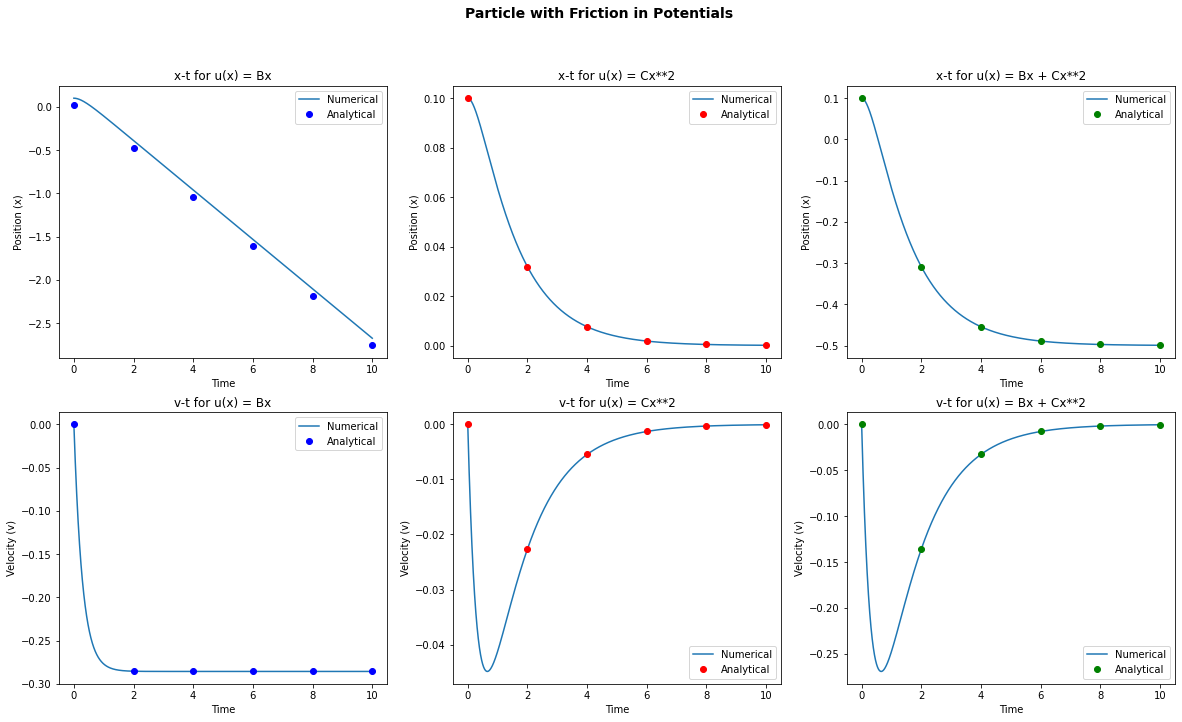

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
m = 1
n = int(1e+5)#Number of timesteps
R = 1e-6 #Radius of the particle
eta = 0.001 #Fluid viscosity
gamma = 3.5#Friction coefficient
time = 10
dt = time/n
dt1 = 2
t_numerical = np.arange(0,time+dt,dt)
t_analytical = np.arange(0,time+dt1,dt1)
C = 1
B = 1
v2 = np.zeros(n+1)
x2 = np.zeros(n+1)
v3 = np.zeros(n+1)
x3 = np.zeros(n+1)
v4 = np.zeros(n+1)
x4 = np.zeros(n+1)
v5 = np.zeros(n+1)
x5 = np.zeros(n+1)
x2[0] = 0.1
x3[0] = 0.1
x4[0] = 0.1
beta1 = (-gamma/m + np.sqrt((gamma/m)**2 - 8*C/m))/2
beta2 = (-gamma/m - np.sqrt((gamma/m)**2 - 8*C/m))/2
c1 = (1/(beta2-beta1))*(beta2*0.1 - B*beta2/(m*beta1**2 - m*beta2*beta1) + B/(m*beta1 - m*beta2))
c2 = (1/(beta1-beta2))*(beta1*0.1 - B/(m*beta1 - m*beta2) + B*beta1/(m*beta1*beta2 - m*beta2**2))

for i in range(n):
    v2[i+1] = v2[i] -gamma*dt*v2[i]/m - B*dt/m 
    x2[i+1] = x2[i] + v2[i]*dt
    v3[i+1] = v3[i] -gamma*dt*v3[i]/m- 2*C*dt*x3[i]/m 
    x3[i+1] = x3[i] + v3[i]*dt
    v4[i+1] = v4[i] -gamma*dt*v4[i]/m -B/m*dt -2*C*dt*x4[i]/m 
    x4[i+1] = x4[i] + v4[i]*dt

plt.figure(figsize = (20,11))
plt.suptitle('Particle with Friction in Potentials',fontsize = 14, fontweight ='bold')
plt.subplot(2,3,1)
plt.title("x-t for u(x) = Bx")
plt.plot(t_numerical,x2)
plt.plot(t_analytical,0.1 - (B*m*np.exp(-gamma*t_analytical/m))/gamma**2 - B*t_analytical/gamma,"bo")
plt.xlabel("Time")
plt.ylabel("Position (x)")
plt.legend(["Numerical","Analytical"])

plt.subplot(2,3,2)
plt.title("x-t for u(x) = Cx**2")
plt.plot(t_numerical,x3)
plt.plot(t_analytical,(beta2*0.1*np.exp(beta1*t_analytical) - beta1*0.1*np.exp(beta2*t_analytical))/(beta2 - beta1),'ro')
plt.xlabel("Time")
plt.ylabel("Position (x)")
plt.legend(["Numerical","Analytical"])

plt.subplot(2,3,3)
plt.title("x-t for u(x) = Bx + Cx**2")
plt.plot(t_numerical,x4)
plt.plot(t_analytical,c1*np.exp(beta1*t_analytical) + c2*np.exp(beta2*t_analytical) + (B/(m*beta1 - m*beta2))*(1/beta1 - 1/beta2),'go')
plt.xlabel("Time")
plt.ylabel("Position (x)")
plt.legend(["Numerical","Analytical"])

plt.subplot(2,3,4)
plt.title("v-t for u(x) = Bx")
plt.plot(t_numerical,v2)
plt.plot(t_analytical,(-B/gamma)*(1-np.exp(-gamma*t_analytical/m)),"bo")
plt.xlabel("Time")
plt.ylabel("Velocity (v)")
plt.legend(["Numerical","Analytical"])

plt.subplot(2,3,5)
plt.title("v-t for u(x) = Cx**2")
plt.plot(t_numerical,v3)
plt.plot(t_analytical,(beta2*0.1*beta1*np.exp(beta1*t_analytical) - beta1*0.1*beta2*np.exp(beta2*t_analytical))/(beta2 - beta1),'ro')
plt.xlabel("Time")
plt.ylabel("Velocity (v)")
plt.legend(["Numerical","Analytical"])

plt.subplot(2,3,6)
plt.title("v-t for u(x) = Bx + Cx**2")
plt.plot(t_numerical,v4)
plt.plot(t_analytical,c1*beta1*np.exp(beta1*t_analytical) + c2*beta2*np.exp(beta2*t_analytical),'go')
plt.xlabel("Time")
plt.ylabel("Velocity (v)")
plt.legend(["Numerical","Analytical"])



$(\frac{\gamma}{m})^2 < \frac{8C}{m}$ For $U(x)=Cx^2$ and $U(x)=Bx+Cx^2$ 

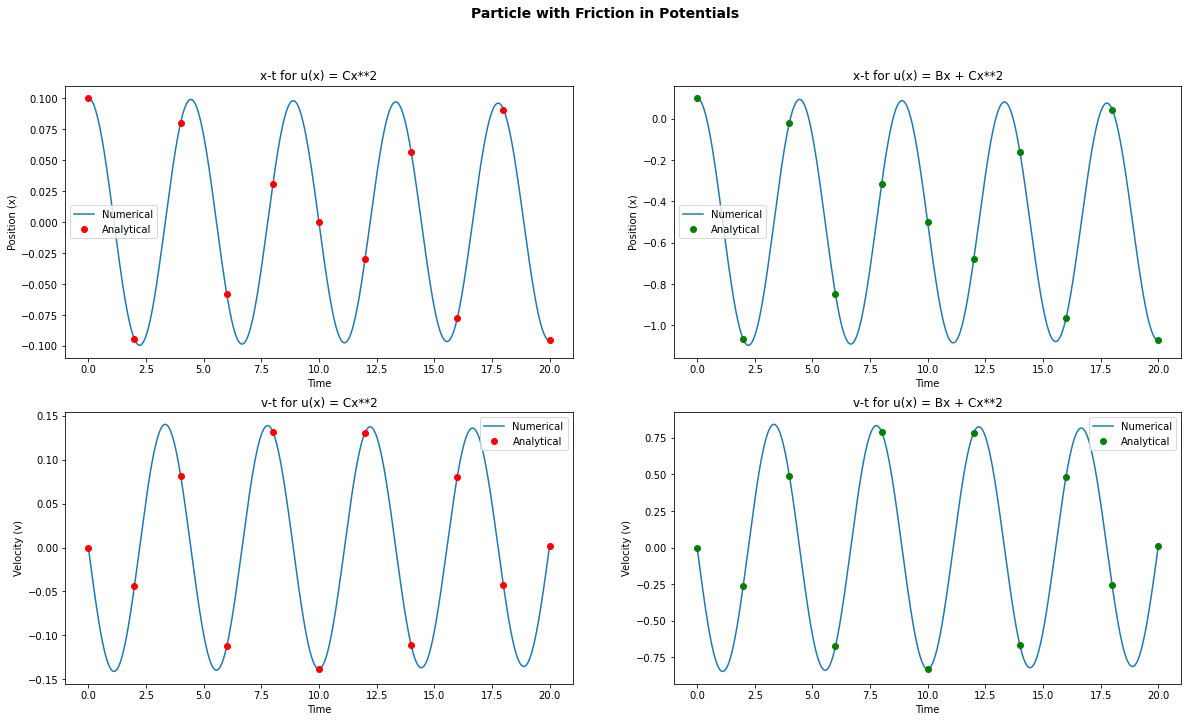

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
m = 1
n = int(1e+5)#Number of timesteps
R = 1e-6 #Radius of the particle
eta = 0.001 #Fluid viscosity
gamma = 0.005#Friction coefficient
time = 20
dt = time/n
dt1 = 2
t_numerical = np.arange(0,time+dt,dt)
t_analytical = np.arange(0,time+dt1,dt1)
C = 1
B = 1
v2 = np.zeros(n+1)
x2 = np.zeros(n+1)
v3 = np.zeros(n+1)
x3 = np.zeros(n+1)
v4 = np.zeros(n+1)
x4 = np.zeros(n+1)
v5 = np.zeros(n+1)
x5 = np.zeros(n+1)
x2[0] = 0.1
x3[0] = 0.1
x4[0] = 0.1
x0 = 0.1
v0 = 0
alpha = np.sqrt(8*C/m - (gamma**2)/(m**2))
c1 = x0
c2 = (2/alpha)*(v0 + gamma*x0/(2*m))
c3 = x0 + (4*B/(gamma**2))*(1/(1+((m**2)*(alpha**2))/gamma**2))
c4 = (2*v0/alpha) + (gamma*x0)/(m*alpha) + (4*B/(m*alpha*gamma))*(1/(1+((m**2)*(alpha**2))/gamma**2))

for i in range(n):
    v3[i+1] = v3[i] -gamma*dt*v3[i]/m - 2*C*dt*x3[i]/m 
    x3[i+1] = x3[i] + v3[i]*dt
    v4[i+1] = v4[i] -gamma*dt*v4[i]/m -B/m*dt -2*C*dt*x4[i]/m 
    x4[i+1] = x4[i] + v4[i]*dt

plt.figure(figsize = (20,11))
plt.suptitle('Particle with Friction in Potentials',fontsize = 14, fontweight ='bold')
plt.subplot(2,2,1)
plt.title("x-t for u(x) = Cx**2")
plt.plot(t_numerical,x3)
plt.plot(t_analytical,np.exp(-gamma*t_analytical/(2*m))*c1*np.cos(alpha*t_analytical/2) + np.exp(-gamma*t_analytical/(2*m))*c2*np.sin(alpha*t_analytical/2),'ro')
plt.xlabel("Time")
plt.ylabel("Position (x)")
plt.legend(["Numerical","Analytical"])

plt.subplot(2,2,2)
plt.title("x-t for u(x) = Bx + Cx**2")
plt.plot(t_numerical,x4)
plt.plot(t_analytical,np.exp(-gamma*t_analytical/(2*m))*c3*np.cos(alpha*t_analytical/2) + np.exp(-gamma*t_analytical/(2*m))*c4*np.sin(alpha*t_analytical/2) - (4*B/(gamma**2))*(1/(1+((m**2)*(alpha**2))/gamma**2)),'go')
plt.xlabel("Time")
plt.ylabel("Position (x)")
plt.legend(["Numerical","Analytical"])

plt.subplot(2,2,3)
plt.title("v-t for u(x) = Cx**2")
plt.plot(t_numerical,v3)
plt.plot(t_analytical,-c1*0.5*(gamma/m)*np.cos(alpha*t_analytical*0.5)*np.exp(-gamma*t_analytical/(2*m)) - c1*0.5*alpha*np.sin(alpha*t_analytical*0.5)*np.exp(-gamma*t_analytical/(2*m)) -c2*0.5*(gamma/m)*np.sin(alpha*t_analytical*0.5)*np.exp(-gamma*t_analytical/(2*m)) + c2*0.5*alpha*np.cos(alpha*t_analytical*0.5)*np.exp(-gamma*t_analytical/(2*m)),'ro')
plt.xlabel("Time")
plt.ylabel("Velocity (v)")
plt.legend(["Numerical","Analytical"])

plt.subplot(2,2,4)
plt.title("v-t for u(x) = Bx + Cx**2")
plt.plot(t_numerical,v4)
plt.plot(t_analytical,-c3*0.5*(gamma/m)*np.cos(alpha*t_analytical*0.5)*np.exp(-gamma*t_analytical/(2*m)) - c3*0.5*alpha*np.sin(alpha*t_analytical*0.5)*np.exp(-gamma*t_analytical/(2*m)) -c4*0.5*(gamma/m)*np.sin(alpha*t_analytical*0.5)*np.exp(-gamma*t_analytical/(2*m)) + c4*0.5*alpha*np.cos(alpha*t_analytical*0.5)*np.exp(-gamma*t_analytical/(2*m)),'go')
plt.xlabel("Time")
plt.ylabel("Velocity (v)")
plt.legend(["Numerical","Analytical"])
